最初に必要なライブラリを読み込みます。

In [1]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit, QubitBra, measure_all, measure_all_oneshot,measure_partial, matrix_to_qubit
from sympy.physics.quantum.gate import H,X,Y,Z,S,T,CPHASE,CNOT,SWAP,UGate,CGateS,gate_simp,OneQubitGate
from sympy.physics.quantum.gate import IdentityGate as _I
from sympy.physics.quantum.qft import *
from sympy.physics.quantum.matrixcache import matrix_cache
matrix_cache.cache_matrix('Tdg',Matrix([[1, 0], [0, exp(-I*pi/4)]]))
matrix_cache.cache_matrix('Sdg',Matrix([[1, 0], [0, -I]]))
matrix_cache.cache_matrix('V',(1/2)*Matrix([[1+I, 1-I], [1-I, 1+I]]))
matrix_cache.cache_matrix('Vdg',(1/2)*Matrix([[1-I, 1+I], [1+I, 1-I]]))

CZ = CPHASE

class Tdg(OneQubitGate): # T^{\dagger} 演算
    gate_name = u'Tdg'
    gate_name_latex = u'T^{\dagger}'
    def get_target_matrix(self, format='sympy'):
        return matrix_cache.get_matrix('Tdg', format)

class Sdg(OneQubitGate): # S^{\dagger} 演算
    gate_name = u'Sdg'
    gate_name_latex = u'S^{\dagger}'
    def get_target_matrix(self, format='sympy'):
        return matrix_cache.get_matrix('Sdg', format)

class V(OneQubitGate): # √X 演算
    gate_name = u'V'
    gate_name_latex = u'V'
    def get_target_matrix(self, format='sympy'):
        return matrix_cache.get_matrix('V', format)

class Vdg(OneQubitGate): # √X ^{\dagger}演算
    gate_name = u'Vdg'
    gate_name_latex = u'V^{\dagger}'
    def get_target_matrix(self, format='sympy'):
        return matrix_cache.get_matrix('Vdg', format)

def CV(c,t):  return CGateS((c),V(t))
def CVdg(c,t):  return CGateS((c),Vdg(t))

def CCX(c1,c2,t):  return CGateS((c1,c2),X(t))
def Toffoli(c1,c2,t):  return CGateS((c1,c2),X(t))
def CCZ(c1,c2,t): return (H(t)*CCX(c1,c2,t)*H(t)) # CCZ演算子を定義します。
def hadamard(s,n):
    h = H(s)
    for i in range(s+1,n+s): h = H(i)*h
    return h

def disp1Q(u): print(u); display(represent(u,nqubits=1)); CircuitPlot(u,nqubits=1)
def disp2Q(u): print(u); display(represent(u,nqubits=2)); CircuitPlot(u,nqubits=2)

from sympy.printing.dot import dotprint
init_printing()

%matplotlib inline
import matplotlib.pyplot as plt
from sympy.physics.quantum.circuitplot import CircuitPlot,labeller, Mz,CreateOneQubitGate
alpha, beta, psi, phi, theta, chi = Symbol(r'\alpha'), Symbol(r'\beta'), Symbol(r'\psi'), Symbol(r'\phi'), Symbol(r'\theta'), Symbol(r'\chi') 
from qutip import *
import numpy as np

（副読本）
* ニールセン・チャン「量子コンピュータと量子通信」（ここでは N,C"QCQI" と書きます）
* arXivに公開されている論文

# 量子コンピュータの基本
## 2.1 量子ビットとは？
### 2.1.1 ブロッホ球とブラケット記法

In [2]:
# ケット
Ket(psi) , alpha * Ket('0') + beta * Ket('1') 

In [3]:
# ブラ
Bra(psi), Dagger(alpha * Ket('0') + beta * Ket('1') ) , Dagger(alpha) * Bra('0') + Dagger(beta) * Bra('1')

In [4]:
# <ψ|ψ> の計算
expand(Dagger(alpha * Ket('0') + beta * Ket('1') ) * (alpha * Ket('0') + beta * Ket('1') ))

$\alpha \alpha^{\dagger} = 1, \beta \beta^{\dagger} = 1,  \langle 0 \vert 0 \rangle = 1, \langle 1 \vert 1 \rangle = 1, \langle 1 \vert 0 \rangle = 0, \langle 0 \vert 1 \rangle = 0$

*keywords*

- グローバル位相
- ブロッホ球
- Z基底（計算基底）
- X基底（アダマール基底）
- Y基底（円基底、Circular basis）

### 2.1.2 量子ビットの不思議な性質

*keywords*
- 確率振幅
- ボルンの規則
- 射影測定
- デコーヒーレンス
- コヒーレント時間

$\alpha \lvert 0 \rangle + \beta \lvert 1 \rangle$のアダマール基底における測定：

$ \langle + \rvert \rightarrow \lvert \psi \rangle = \frac{1}{\sqrt{2}}(\langle 0 \rvert + \langle 1 \rvert) (\alpha \lvert 0 \rangle + \beta \lvert 1 \rangle) = \frac{1}{\sqrt{2}}(\alpha + \beta) $

$ \langle - \rvert \rightarrow \lvert \psi \rangle = \frac{1}{\sqrt{2}}(\langle 0 \rvert - \langle 1 \rvert) (\alpha \lvert 0 \rangle + \beta \lvert 1 \rangle) = \frac{1}{\sqrt{2}}(\alpha - \beta) $

$ T_1 $ : $\lvert 1 \rangle$が  $\lvert 0 \rangle$になってしまう時間  
$ T_2 $：重ね合わせが壊れてしまう時間

## 2.2 量子ゲートで計算する
### 2.2.1 １量子ビットゲート

* Xゲート

X(0)


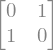

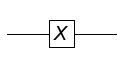

In [6]:
disp1Q(X(0))

X(0)*|0>


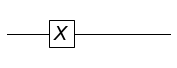

In [7]:
disp1Q(X(0)*Qubit('0'))

X(0)*|1>


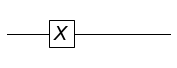

In [8]:
disp1Q(X(0)*Qubit('1'))

* Yゲート

Y(0)


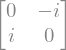

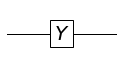

In [9]:
disp1Q(Y(0))

* Zゲート

Z(0)


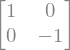

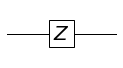

In [10]:
disp1Q(Z(0))

Z(0)*|0>


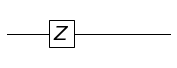

In [11]:
disp1Q(Z(0)*Qubit('0'))

Z(0)*|1>


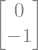

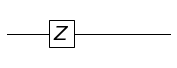

In [12]:
disp1Q(Z(0)*Qubit('1'))

* アダマールゲート（H）

H(0)


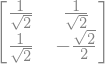

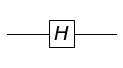

In [13]:
disp1Q(H(0))

* 位相ゲート（S）  
Z軸周りの $ \pi / 2 $ 回転

S(0)


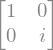

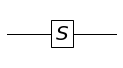

In [14]:
disp1Q(S(0))

* $\pi/8$ゲート（T）  
Z軸周りの $ \pi / 4 $ 回転

T(0)


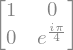

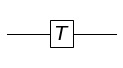

In [15]:
disp1Q(T(0))

T(0)*1(0)*T(0)


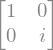

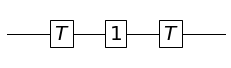

In [16]:
# TT 
disp1Q(T(0) *_I(0)* T(0))  # CircuitPlot がうまく描けないため恒等変換（I）を挟む

S(0)*1(0)*S(0)


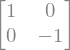

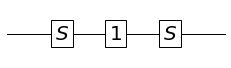

In [17]:
# SS
disp1Q(S(0)*_I(0) *S(0))  # CircuitPlot がうまく描けないため恒等変換（I）を挟む

### 2.2.2 ２量子ビットゲート

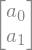

In [18]:
a0, a1, b0, b1 = Symbol('a0'), Symbol('a1'), Symbol('b0'), Symbol('b1')
Matrix([[a0],[a1]])

In [19]:
 Matrix([b0,b1])

In [20]:
Matrix([[a0],[a1]]) .dot( Matrix([b0,b1]) )

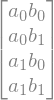

In [21]:
TensorProduct(Matrix([a0,a1]),( Matrix([b0,b1]) ))

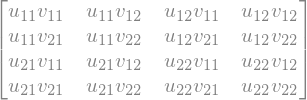

In [22]:
u11, u12, u21, u22 = Symbol('u11'), Symbol('u12'), Symbol('u21'), Symbol('u22')
v11, v12, v21, v22 = Symbol('v11'), Symbol('v12'), Symbol('v21'), Symbol('v22')
TensorProduct(Matrix([[u11, u12], [u21, u22]]), Matrix([[v11, v12], [v21, v22]]))

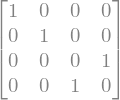

In [23]:
represent(CNOT(1,0),nqubits=2)

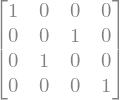

In [24]:
represent(SWAP(1,0), nqubits=2)

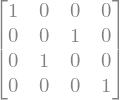

In [25]:
sw=CNOT(1,0)*CNOT(0,1)*CNOT(1,0)
represent(sw,nqubits=2)

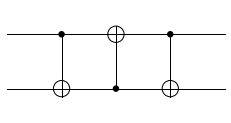

In [26]:
CircuitPlot(sw, nqubits=2)

## 2.3 量子回路図を書いてみよう
### 2.3.1 量子回路図の書き方

In [27]:
q=H(2)*CZ(1,2)*CNOT(0,1)*H(0)*H(2)

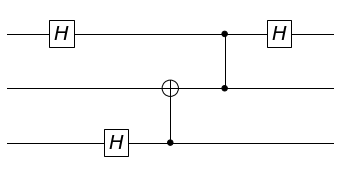

In [28]:
CircuitPlot(q, nqubits=3)

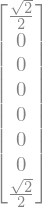

In [29]:
qst=represent(q*Qubit('000'),nqubits=3)
qst

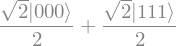

In [30]:
matrix_to_qubit(qst)

### 2.3.2 量子コンピュータ版NANDゲート（Toffoliゲート）

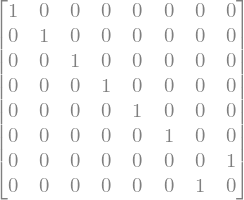

In [31]:
represent(Toffoli(2,1,0),nqubits=3)

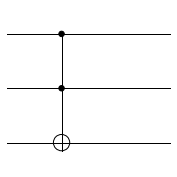

In [32]:
CircuitPlot(Toffoli(2,1,0),nqubits=3)

（参考）

[Elementary gates for quantum computation(arXiv:quant-ph/9503016)](https://arxiv.org/abs/quant-ph/9503016) ←1995年に示されている  
N,C"QCQI" 「4.3 制御演算」に説明あり

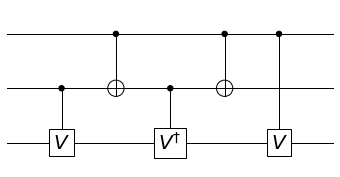

In [33]:
tof=CV(2,0)*CNOT(2,1)*CVdg(1,0)*CNOT(2,1)*CV(1,0)
CircuitPlot(tof,nqubits=3)

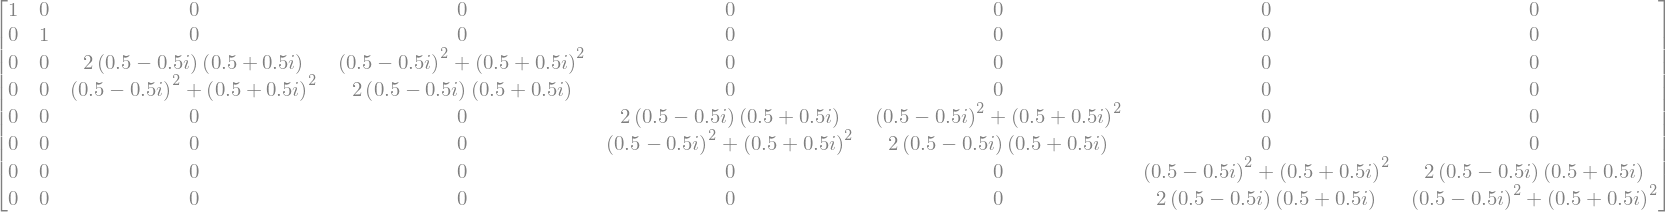

In [34]:
represent(tof, nqubits=3)
# 2(0.5−0.5𝑖)(0.5+0.5𝑖) = 1
# (0.5−0.5𝑖)^2+(0.5+0.5𝑖)^2 = 0

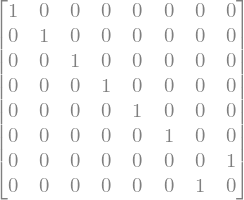

In [35]:
def Toff(q0,q1,q2):
    return T(q0)*S(q1)*CNOT(q0,q1)*Tdg(q1)*CNOT(q0,q1)\
            *H(q2)*Tdg(q1)*T(q2)*CNOT(q0,q2)*Tdg(q2)*CNOT(q1,q2)\
            *T(q2)*CNOT(q0,q2)*Tdg(q2)*CNOT(q1,q2)*H(q2)

represent(Toff(2,1,0), nqubits=3)  # 行列表現を表示します

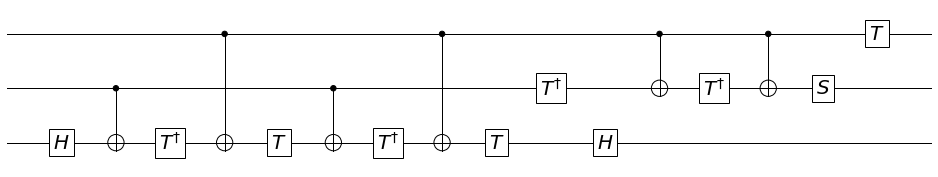

In [36]:
CircuitPlot(Toff(2,1,0),nqubits=3)

### 2.3.3 量子コンピュータ版足し算回路

* 半加算器（half adder）  
 1 桁の 2 進数を ２つ加算

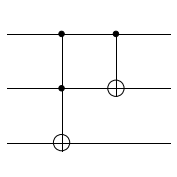

In [37]:
halfadder=CNOT(2,1)*Toffoli(2,1,0)
CircuitPlot(halfadder,nqubits=3)

* 全加算器（full adder）  
  1 桁の 2 進数を ３ つ加算

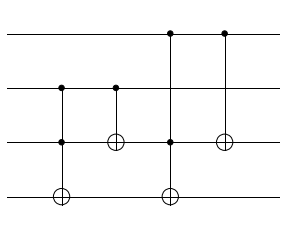

In [38]:
halfadder=CNOT(3,1)*Toffoli(3,1,0)*CNOT(2,1)*Toffoli(2,1,0)
CircuitPlot(halfadder,nqubits=4)

> 等価な算術演算ができるという意味では量子コンピュータは古典コンピュータの上位互換といえますが、そのご利益はそれほど自明ではありません。

### 2.3.4 量子コンピュータ版算術論理演算

"重ね合わせ状態を使って並列計算"  ⇔　ボルンの規則による、値の取り出し（測定）は 1/N の確率

入力として用いる重ね合わせ状態 $\displaystyle \lvert x \rangle = \frac{1}{\sqrt{N}} \sum_{i=1}^N \lvert x_{i} \rangle $ は、$ \lvert 0 \dots 0 \rangle $ に全ての量子ビットにアダマールをかけたもの

In [39]:
superposition=hadamard(0,4)*Qubit('0'*4)
superposition

In [40]:
transpose(represent(superposition,nqubits=4))

### 2.3.5 万能量子計算

(Qiita記事）[量子コンピューターがコンピューターである理由](https://qiita.com/kyamaz/items/9c99bbf66c45fca535e5)  
(Qiita記事）[量子コンピューターの計算精度とSolovay-Kitaevの定理](https://qiita.com/kyamaz/items/6d2c2708cb3351e57be1)  
N,C"QCQI" 「付録C Solovay-Kitaevの定理」  

 https://www.mathstat.dal.ca/~selinger/newsynth/ ← Haskell based なサンプルがあります。（コマンド実行できます）

## 2.4 コピーとテレポーテーション
### 2.4.1 量子もつれ（エンタングルメント）とは？

積状態：
$\begin{equation}
\left.\begin{aligned}
\big( \alpha \lvert 0 \rangle
+ \beta \lvert 1 \rangle \big)
\otimes \big( \gamma \lvert 0 \rangle
+ \delta \lvert 1 \rangle \big)
& = \alpha \gamma \lvert 00 \rangle
+ \alpha \delta \lvert 01 \rangle
+ \beta \gamma \lvert 10 \rangle
+ \beta \delta \lvert 11 \rangle
\end{aligned} \right.
\end{equation}$

エンタングル状態：単純な積では表すことができない状態  

例）Bell状態

$\begin{equation}
\left.\begin{aligned}
\lvert \Phi_{+} \rangle =
\frac{1}{\sqrt{2}} \lvert 00 \rangle
+ \frac{1}{\sqrt{2}} \lvert 11 \rangle
\end{aligned} \right.
\end{equation}$

$\begin{equation}
\left.\begin{aligned}
\lvert \Phi_{-} \rangle =
\frac{1}{\sqrt{2}} \lvert 00 \rangle
- \frac{1}{\sqrt{2}} \lvert 11 \rangle
\end{aligned} \right.
\end{equation}$

$\begin{equation}
\left.\begin{aligned}
\lvert \Psi_{+} \rangle =
\frac{1}{\sqrt{2}} \lvert 01 \rangle
+ \frac{1}{\sqrt{2}} \lvert 10 \rangle
\end{aligned} \right.
\end{equation}$

$\begin{equation}
\left.\begin{aligned}
\lvert \Psi_{-} \rangle =
\frac{1}{\sqrt{2}} \lvert 01 \rangle
- \frac{1}{\sqrt{2}} \lvert 10 \rangle
\end{aligned} \right.
\end{equation}$

計算基底でエンタングルしている状態$\lvert \Phi_{+} \rangle$の、アダマール基底を調べる

$\begin{equation}
\left.\begin{aligned}
\lvert \Phi_{+} \rangle
&= \frac{1}{\sqrt{2}} \lvert 00 \rangle
+ \frac{1}{\sqrt{2}} \lvert 11 \rangle \\ 
&= \frac{1}{2 \sqrt{2}} \left\{ ( \lvert +\rangle + \lvert -\rangle ) \otimes ( \lvert +\rangle + \lvert -\rangle )
+ ( \lvert +\rangle - \lvert -\rangle ) \otimes ( \lvert +\rangle - \lvert -\rangle )  \right\} \\
&= \frac{1}{2 \sqrt{2}} \left\{ \lvert ++ \rangle + \lvert +- \rangle + \lvert -+ \rangle + \lvert -- \rangle
+ \lvert ++ \rangle - \lvert +- \rangle - \lvert -+ \rangle + \lvert -- \rangle
\right\} \\
&= \frac{1}{\sqrt{2}} \lvert ++ \rangle
+ \frac{1}{\sqrt{2}} \lvert -- \rangle
\end{aligned} \right.
\end{equation}$


（参考）
[Efficient evaluation of quantum observables using entangled measurements(arXiv:1909.09119)](https://arxiv.org/abs/1909.09119)

「Entanglion」IBM Research考案には、次のようなBell状態の線型結合の状態がでてきます。

$\begin{equation}
\left.\begin{aligned}
\lvert \Omega_{0} \rangle
&= \frac{1}{\sqrt{2}}
\lvert \Phi_{+} \rangle
+ \frac{1}{\sqrt{2}}
\lvert \Psi_{-} \rangle \\
&=\frac{1}{2}(
  \lvert 00 \rangle
+ \lvert 01 \rangle
- \lvert 10 \rangle
+ \lvert 11 \rangle
)
\end{aligned} \right.
\end{equation}$

$\begin{equation}
\left.\begin{aligned}
\lvert \Omega_{1} \rangle
&= -\frac{1}{\sqrt{2}}
\lvert \Phi_{-} \rangle
+ \frac{1}{\sqrt{2}}
\lvert \Psi_{+} \rangle \\
&=\frac{1}{2}(
- \lvert 00 \rangle
+ \lvert 01 \rangle
+ \lvert 10 \rangle
+ \lvert 11 \rangle
)
\end{aligned} \right.
\end{equation}$

$\begin{equation}
\left.\begin{aligned}
\lvert \Omega_{2} \rangle
&= \frac{1}{\sqrt{2}}
\lvert \Phi_{-} \rangle
+ \frac{1}{\sqrt{2}}
\lvert \Psi_{+} \rangle \\
&=\frac{1}{2}(
  \lvert 00 \rangle
+ \lvert 01 \rangle
+ \lvert 10 \rangle
- \lvert 11 \rangle
)
\end{aligned} \right.
\end{equation}$

$\begin{equation}
\left.\begin{aligned}
\lvert \Omega_{3} \rangle
&= \frac{1}{\sqrt{2}}
\lvert \Phi_{+} \rangle
- \frac{1}{\sqrt{2}}
\lvert \Psi_{-} \rangle \\
&=\frac{1}{2}(
 \lvert 00 \rangle
- \lvert 01 \rangle
+ \lvert 10 \rangle
+ \lvert 11 \rangle
)
\end{aligned} \right.
\end{equation}$

### 2.4.2 量子データはコピーできない？

* 量子複製不可能定理（No-Cloning Theorem）

ある量子状態$A_{@x}$から, 同じ量子状態を２つ($A_{@x}$と$A_{@y}$)を作ることができない.  
ある量子状態$A_{@x}$から, 同じ量子状態$A_{@y}$に移動することはできる. ただし, 元あった量子状態 $A_{@x}$ は状態を維持できない.

* ”光速を超えて情報を伝えることは不可能です”


* （補足）ベルの不等式の破れ

詳しくは, 清水明「新版 量子論の基礎」第8章  
ベルの不等式の一種「CHSH不等式」における"不等式の破れ"の解説あり


**ベルの不等式**
```
適当な物理量の組のある相関Cについて、原因と結果が逆転したり
しないまともな理論の範囲内では、
−2 ≤ C ≤ 2
をどんな実在論も満たす。
```
<font color="red">しかし、量子論はその不等式を破る場合がある。$|C| = 2\sqrt{2}$ の例が示せる。</font>


### 2.4.3 量子データを転送する

 * 量子テレポーテーション

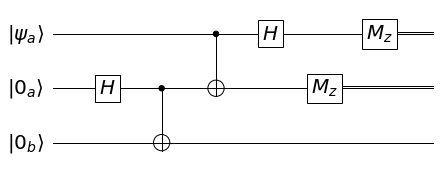

In [41]:
qtelep = Mz(2)*Mz(1)*H(2)*CNOT(2,1)*CNOT(1,0)*H(1)
CircuitPlot(qtelep,nqubits=3, labels=["0_{b}","0_{a}","\psi_{a}"])

$\begin{equation}
\left.\begin{aligned}
\Big[
\lvert \psi \rangle _{a}
\otimes
\lvert 0 \rangle _{a}
\Big]
\lvert 0 \rangle _{b}
\end{aligned} \right.
\end{equation}$

$\begin{equation}
\left.\begin{aligned}
\otimes H \cdots \Rightarrow
\Big[
\lvert \psi \rangle _{a}
\otimes
\frac{1}{\sqrt{2}} \left(
\lvert 0 \rangle _{a} +  \lvert 1 \rangle _{a}
\right) 
\Big]
\lvert 0 \rangle _{b}
\end{aligned} \right.
\end{equation}$

$\begin{equation}
\left.\begin{aligned}
\otimes CNOT _{1} \cdots \Rightarrow
\lvert \psi \rangle _{a}
\otimes
\frac{1}{\sqrt{2}} \left(
\lvert 0 \rangle _{a} \lvert 0 \rangle _{b}  +  \lvert 1 \rangle _{a} \lvert 1 \rangle _{b} 
\right) 
\end{aligned} \right.
\end{equation}$

$\begin{equation}
\left.\begin{aligned}
\quad \quad \quad =
\left( \alpha \lvert 0 \rangle _{a}
+ \beta \lvert 1 \rangle _{a} \right)
\otimes
\frac{1}{\sqrt{2}} \left(
\lvert 0 \rangle _{a} \lvert 0 \rangle _{b}  +  \lvert 1 \rangle _{a} \lvert 1 \rangle _{b} 
\right) 
\end{aligned} \right.
\end{equation}$

$\begin{equation}
\left.\begin{aligned}
\otimes CNOT _{2} \cdots \Rightarrow
\frac{1}{\sqrt{2}} \left(
\alpha \lvert 0 \rangle _{a} \lvert 0 \rangle _{a} \lvert 0 \rangle _{b}
+ \alpha \lvert 0 \rangle _{a} \lvert 1 \rangle _{a} \lvert 1 \rangle _{b}
+
\beta \lvert 1 \rangle _{a} \lvert 1 \rangle _{a} \lvert 0 \rangle _{b}
+ \beta \lvert 1 \rangle _{a} \lvert 0 \rangle _{a} \lvert 1 \rangle _{b}
\right) 
\end{aligned} \right.
\end{equation}$

$\begin{equation}
\left.\begin{aligned}
\otimes H \cdots \Rightarrow
(1/2) (
&+ \alpha \lvert 0 \rangle _{a} \lvert 0 \rangle _{a} \lvert 0 \rangle _{b}
+
\alpha \lvert 1 \rangle _{a} \lvert 0 \rangle _{a} \lvert 0 \rangle _{b} \\
& +
\alpha \lvert 0 \rangle _{a} \lvert 1 \rangle _{a} \lvert 1 \rangle _{b}
+
\alpha \lvert 1 \rangle _{a} \lvert 1 \rangle _{a} \lvert 1 \rangle _{b} \\
& +
\beta \lvert 0 \rangle _{a} \lvert 1 \rangle _{a} \lvert 0 \rangle _{b}
-
\beta \lvert 1 \rangle _{a} \lvert 1 \rangle _{a} \lvert 0 \rangle _{b} \\
& +
\beta \lvert 0 \rangle _{a} \lvert 0 \rangle _{a} \lvert 1 \rangle _{b}
-
\beta \lvert 1 \rangle _{a} \lvert 0 \rangle _{a} \lvert 1 \rangle _{b}
)
\end{aligned} \right.
\end{equation}$

$\begin{equation}
\left.\begin{aligned}
\quad \quad \quad =
(1/2) (
&+ \lvert 0 \rangle _{a} \lvert 0 \rangle _{a} ( \alpha \lvert 0 \rangle _{b} +\beta \lvert 1 \rangle _{b}) \\
& +
\lvert 0 \rangle _{a} \lvert 1 \rangle _{a} ( \alpha \lvert 1 \rangle _{b} + \beta \lvert 0 \rangle _{b}) \\
&+
\lvert 1 \rangle _{a} \lvert 0 \rangle _{a} ( \alpha \lvert 0 \rangle _{b} - \beta \lvert 1 \rangle _{b} )\\
& +
\lvert 1 \rangle _{a} \lvert 1 \rangle _{a} ( \alpha \lvert 1 \rangle _{b} - \beta \lvert 0 \rangle _{b}) )
\end{aligned} \right.
\end{equation}$

### 2.4.4 量子ゲート操作を転送する

* ゲートテレポーテーション
* 測定型量子計算

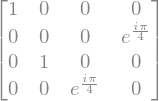

In [42]:
gate_qtelep=T(0)*CNOT(1,0)*Tdg(0)*T(0)*CNOT(0,1)
represent(gate_qtelep,nqubits=2)

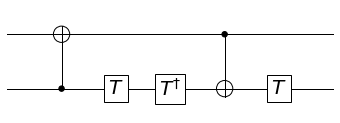

In [43]:
CircuitPlot(gate_qtelep,nqubits=2)

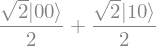

In [44]:
matrix_to_qubit(represent(gate_qtelep*H(0)*Qubit('00'),nqubits=2))

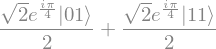

In [45]:
matrix_to_qubit(represent(gate_qtelep*H(0)*Qubit('10'),nqubits=2))

CNOT（の制御側）と T の交換

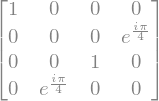

In [46]:
t_cnot=CNOT(0,1)*T(0)
represent(t_cnot,nqubits=2)

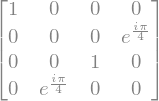

In [47]:
cnot_t=T(0)*CNOT(0,1)
represent(t_cnot,nqubits=2)

$ TXT^{\dagger} $の計算

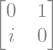

In [48]:
TXTdg = T(0)*X(0)*Tdg(0)
represent(exp(I*pi/4)*TXTdg, nqubits=1)

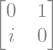

In [49]:
represent(S(0)*X(0), nqubits=1)

Controlled- SX

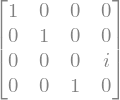

In [50]:
def CSX(c,t):  return CNOT(c,t)*CGateS([c],S(t))
represent(CSX(1,0),nqubits=2)

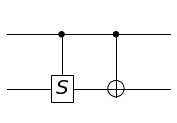

In [51]:
CircuitPlot(CSX(1,0),nqubits=2)

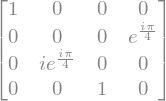

In [52]:
gate_qtelep2 = CSX(1,0)*T(0)*CNOT(0,1)
represent(gate_qtelep2,nqubits=2)

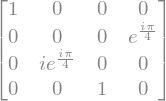

In [53]:
gate_qtelep3 = CSX(1,0)*CNOT(0,1)*T(0)
represent(gate_qtelep3,nqubits=2)

（参考）6.4.4 魔法状態（magic state）とは？

$ \displaystyle \lvert T _{L} \rangle = T \lvert + _{L} \rangle = e^{-i\frac{\pi}{8} Z} \frac{1}{\sqrt{2}} ( \lvert 0 _{L}\rangle + \lvert 1 _{L} \rangle )$

魔法状態蒸留（magic state distillation）… 十分にエラーの少ない $ \lvert T _ {L} \rangle $ を作り出す方法

１回の魔法状態上流に少なくとも、15量子ビットの補助量子ビットが必要。$l$回行うと$15^{l}$個の補助量子ビットが必要で、それだけかけて、精度の高い１論理 T ゲート（正確には「魔法状態」）が作り上げられる。